In [10]:
import pandas as pd
import seaborn as srn
import statistics as sts
import matplotlib.pyplot as plt
from google.colab import files
from sklearn import preprocessing

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
uploaded = files.upload()

In [12]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv",sep=",")
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df_test = pd.read_csv("/content/test.csv",sep=",")
df_test.head()

FileNotFoundError: ignored

In [ ]:
print(df_train.shape)
print(df_test.shape)

(381109, 12)
(127037, 11)


**Um gŕafico de Scatter Matriz será implementado nos dados brutos. Assim como o Scatter plots que consiste em um tipo de gráfico comumente utilizado para observar o comportamento entre duas variáveis, o Scatter Matriz utiliza todo o Data Frame, pois que irá gerar os scatter plots para todos os pares possíveis de atributos.**

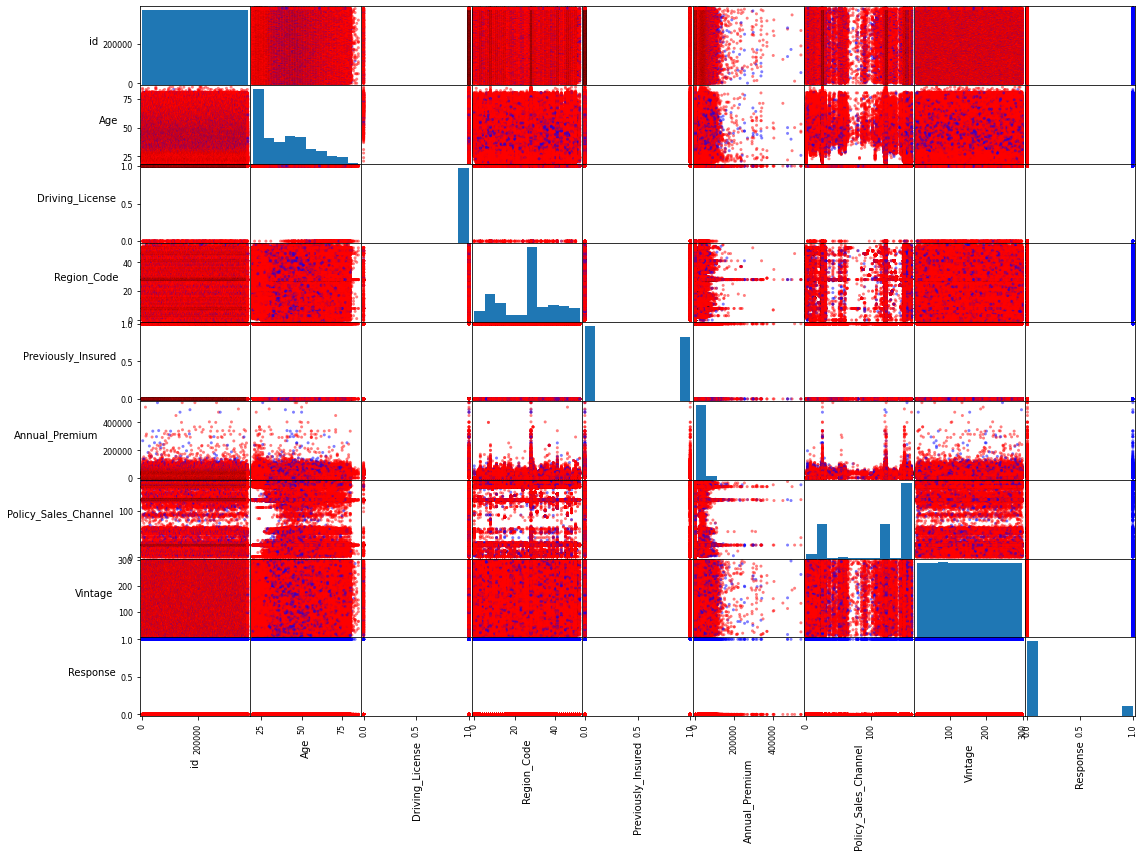

In [13]:
#Scatter Matriz
#criando um dicionario para mapear cada classe para uma cor 
classe_cor = {0 : 'red',1 : 'blue'}
#criando uma lista com as cores de cada exemplo
cores = [classe_cor[nome] for nome in df_train.Response]
# gerando matriz de scatter plots
#pd.scatter_matrix(df_train, color=cores)
axes = pd.plotting.scatter_matrix(df_train, diagonal= 'hist', color=cores,figsize=(16,12))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

## **Explorando os dados categóricos (qualitativos). Para esses utilizarei o gráfico de barras, pizza e linha para obter uma visão mais clara da distribuição dos dados. Não utilizei o Histograma e Boxplot, pois esses são para dados quantitativos.**

**1 - Atributo Gender**

**Agrupando os dados de gênero dos clientes**

In [ ]:
group = df_train.groupby(['Gender']).size()
group

Gender
Female    175020
Male      206089
dtype: int64

**Visualizar o dados de gênero dos clientes em um gráfico de barras.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


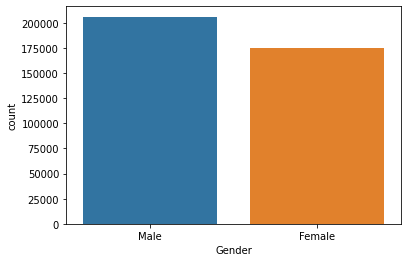

In [ ]:
srn.countplot(df_train['Gender'])

**2 - Atributo Vehicle_Age**

**Agrupando  a idade dos veículos**

In [ ]:
group = df_train.groupby(['Vehicle_Age']).size()
group

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
dtype: int64

**Visualizar a idade dos clientes em um gráfico de pizza**

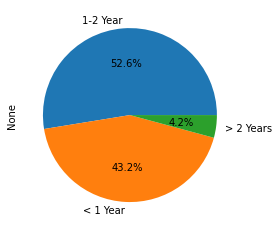

In [ ]:
group.plot.pie(autopct="%.1f%%");

**3 - Atributo Vehicle_Damage**

**Agrupando os dados de dano do veículo**

In [ ]:
group = df_train.groupby(['Vehicle_Damage']).size()
group

Vehicle_Damage
No     188696
Yes    192413
dtype: int64

**Visualizar os dados de dano do veículo em um gráfico de barras**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


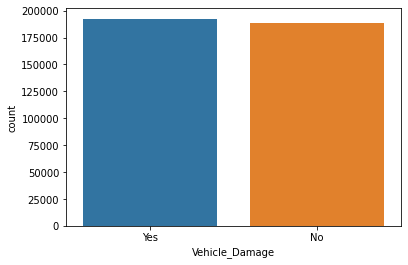

In [ ]:
srn.countplot(df_train['Vehicle_Damage'])

**4 - Atributo Driving_License**

**Analisando o dado Driving_License. Valores possíveis:**

*   0 não tem licença;
*   1 tem licença



In [ ]:
#Agrupando os dados
group = df_train.groupby(['Driving_License']).size()
group

Driving_License
0       812
1    380297
dtype: int64

**Visualizar os dados de licença em um gráfico de pizza**

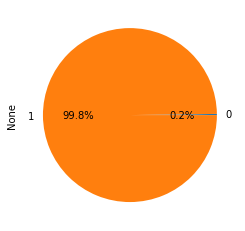

In [ ]:
group.plot.pie(autopct="%.1f%%");

**5 - Atributo Region_Code**

**Explorando o Region_Code**	

In [ ]:
group = df_train.groupby(['Region_Code']).size()

Region_Code
0.0       2021
1.0       1008
2.0       4038
3.0       9251
4.0       1801
5.0       1279
6.0       6280
7.0       3279
8.0      33877
9.0       3101
10.0      4374
11.0      9232
12.0      3198
13.0      4036
14.0      4678
15.0     13308
16.0      2007
17.0      2617
18.0      5153
19.0      1535
20.0      1935
21.0      4266
22.0      1309
23.0      1960
24.0      2415
25.0      2503
26.0      2587
27.0      2823
28.0    106415
29.0     11065
30.0     12191
31.0      1960
32.0      2787
33.0      7654
34.0      1664
35.0      6942
36.0      8797
37.0      5501
38.0      2026
39.0      4644
40.0      1295
41.0     18263
42.0       591
43.0      2639
44.0       808
45.0      5605
46.0     19749
47.0      7436
48.0      4681
49.0      1832
50.0     10243
51.0       183
52.0       267
dtype: int64

**Visualizar os dados de código da região em um gráfico de linhas. Essa opção foi utilizada devido quantidade enorme de agrupamento, uma vez que dificultaria a visualização em gráfico de barras padrão**

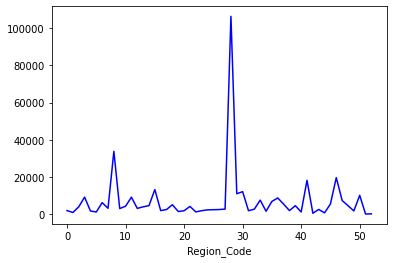

In [ ]:
group.plot.line(color='blue')
#srn.distplot(df_train['Age']).set_title('Age')

**6 - Atributo  Previously_Insured** 

**Analisando o campo Previously_Insured. Valores possíveis:**

*   0  cliente não tem seguro de veículos;
*   1  cliente tem seguro de veículos;


In [ ]:
#Agrupando os dados
group = df_train.groupby(['Previously_Insured']).size()
group

Previously_Insured
0    206481
1    174628
dtype: int64

**Analisando o campo Previously_Insured em um gráfico de pizza**

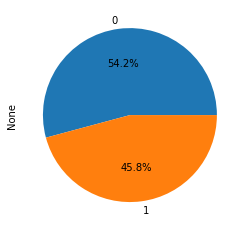

In [ ]:
group.plot.pie(autopct="%.1f%%");

**7 - Policy_Sales_Channel**

**Analisando o campo Policy_Sales_Channel. Esse campo é um código anônimo para o canal de divulgação ao cliente, ou seja. Agentes diferentes, por correio, por telefone, pessoalmente, etc.**

In [ ]:
group = df_train.groupby(['Policy_Sales_Channel']).size()
group

Policy_Sales_Channel
1.0       1074
2.0          4
3.0        523
4.0        509
6.0          3
         ...  
157.0     6684
158.0      492
159.0       51
160.0    21779
163.0     2893
Length: 155, dtype: int64

**Visualizar os dados de código de política do canal de vendas em um gráfico de linhas. Essa opção foi utilizada devido quantidade enorme de agrupamento, uma vez que dificultaria a visualização em gráfico de barras padrão.**

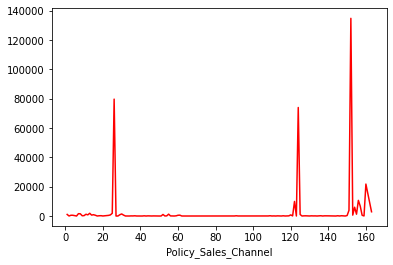

In [ ]:
group.plot.line(color="red")

**Ao analisar os dados qualitativos não foi não foi detectado nenhuma anornalia como: dados fora do padrão (escrita) ou células nulas. Contudo, alguns esses serão convertidos para númericos e, desse modo, implementar os algorítmos de machine learning**

# **Explorando os dados quantitativos. Para esses utilizarei o Histograma e Boxplot e, assim obter uma visão mais clara da distribuição dos dados.**

**8 - Explorando a variável Age**


In [ ]:
df_train['Age'].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

**Ao observar esses dados de Age, constata-se que a mediana e média estão próximas, portanto, isso indica que não exite grandes outliers, ou seja, existe uma distribuição regular dos dados. Também no valor mínimo é possível identificar que não existe valor igual a 0.Para ter uma visão completa da distribuição, será utilizado o histograma e o boxplot. Alguns valores importantes: mean(média), std(desvio padrão), 50% (mediana) serão explorados**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Age')

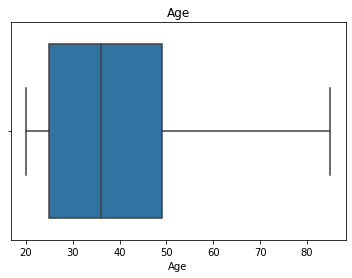

In [ ]:
#Visualizar os dados de Age por um boxplot
srn.boxplot(df_train['Age']).set_title('Age')

**O Boxplot indica que a idade está entre 20 e 85 anos e não há outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age')

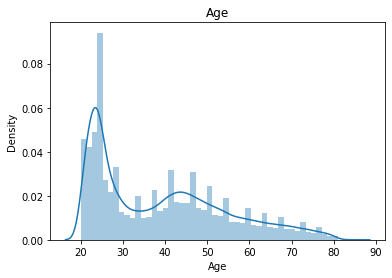

In [ ]:
#Visualizar os dados de Age em um histograma
srn.distplot(df_train['Age']).set_title('Age')

**Para a idade foi gerado um histograma assimétrico. A freqüência decresce bruscamente em um dos lados de forma gradual no outro, produzindo uma calda mais longa em um dos lados. Assimetria à direita, mediana é inferior a média. Assimetria à esquerda, mediana é superior à média. O gráfico confirma o que foi calculado na função describe**

**9 - Atributo Annual_Premium**

**Analisando o atributo Annual_Premium. Esse é o valor que o cliente precisa pagar como prêmio no ano.**

In [ ]:
df_train['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Annual_Premium')

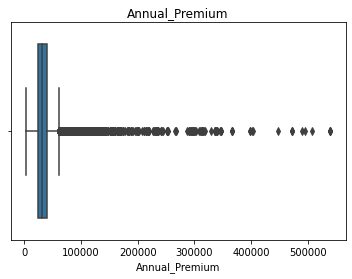

In [ ]:
#Visualizar os dados de Annual_Premium por um boxplot
srn.boxplot(df_train['Annual_Premium']).set_title('Annual_Premium')

**Analisando o boxplot pode-se obervar que há outliers. Nesse gráfico existe um desvio padrão à direita**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Annual_Premium')

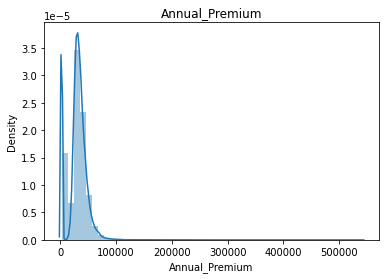

In [ ]:
#Visualizar os dados de Annual_Premium em um histograma
srn.distplot(df_train['Annual_Premium']).set_title('Annual_Premium')

**Histograma com dois picos. Isso indica que houve misturas de dados com médias, obtidos em duas condições distintas. Esse gráfico responderia o desvio padrão do boxplot, contudo, pasra que não posso causar um enviesamento so algortmo irei normalizar com a função min-max. Isso será realizado na correção de dados.**

**10 - Atributo Vintage**

**Analisando o campo Vintage. Número de dias queo cliente esteve associado à empresa**

In [ ]:
df_train['Vintage'].describe()

count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Vintage')

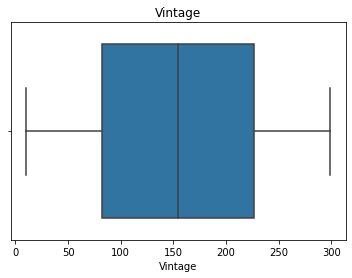

In [ ]:
#Visualizar os dados de Vintage por um boxplot
srn.boxplot(df_train['Vintage']).set_title('Vintage')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Vintage')

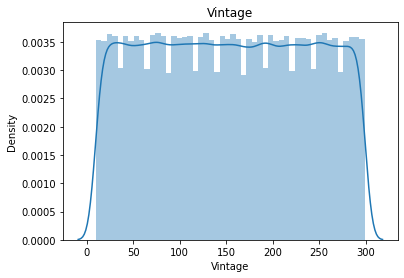

In [ ]:
#Visualizar os dados de Vintage por um histograma
srn.distplot(df_train['Vintage']).set_title('Vintage')

**Histograma do tipo platô ou achatado.  Indice que os dados são combinados de  várias distribuições com médias diferentes.**

**10 - Explorando a Classe - Atributo Response**

In [ ]:
group = df_train.groupby(['Response']).size()
group

Response
0    334399
1     46710
dtype: int64

**Exibindo os dados da classe em um gráfico de barras.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


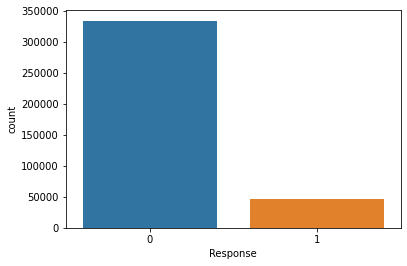

In [ ]:
srn.countplot(df_train['Response'])

**Como pode-se observar os dados estão desbalanceados, portanto, um balanceamento antes de executar o modelo será necessário. Caso contrário o modelo ficará enviesado.**

# **Finalizando a análise exploratória. Verificando se existe valores nulos(NAN).**

In [ ]:
#Verificar os valores nulos
#Eliminar a valores nulos 
df_train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

**Não há nenhum campo nulo.**